In [1]:
from util.bandit_util import StochasticContextualArmAcquiringMachine
from algorithms.eps_greedy import eps_greedy, decay_eps_greedy
from algorithms.etc import etc
from algorithms.ucb import ucb_basic, auer, ucb_AO, ucb_fast, ucb_faster, linucb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
num_rounds = 100000

acquire_probability = 0.02


bandit_machine = StochasticContextualArmAcquiringMachine(acquire_probability)
bandit_machine.insert_arm(bandit_machine.generate_arm())
bandit_machine.insert_arm(bandit_machine.generate_arm())

In [3]:
num_trials = 10
# # UCB test
print("Running UCB tests")
ucb_alg = ucb_basic(bandit_machine, num_rounds)
ucb_regret, ucb_reward, ucb_exp_reward, ucb_best_exp_reward = ucb_alg.run_experiment(num_trials, num_rounds)


Running UCB tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


In [4]:
num_trials = 10
# # UCB test
print("Running UCB tests")
linucb_alg = linucb(bandit_machine)
linucb_regret, linucb_reward, linucb_exp_reward, linucb_best_exp_reward = linucb_alg.run_experiment(num_trials, num_rounds)


Running UCB tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


In [5]:
num_trials = 10
# # UCB test
print("Running UCB tests")
ucb_alg = ucb_basic(bandit_machine, num_rounds)
ucb_regret, ucb_reward, ucb_exp_reward, ucb_best_exp_reward = ucb_alg.run_experiment(num_trials, num_rounds)

# # AUER test
print("Running AUER tests")
auer_alg = auer(bandit_machine)
auer_regret, auer_reward, auer_exp_reward, auer_best_exp_reward = auer_alg.run_experiment(num_trials, num_rounds)

# # UCB - Asymptotically Optimal
print("Running UCB AO tests")
ucbao_alg = ucb_AO(bandit_machine)
ucbao_regret, ucbao_reward, ucbao_exp_reward, ucbao_best_exp_reward = ucbao_alg.run_experiment(num_trials, num_rounds)

# # eps-greedy test
print("Running eps greedy tests")
initial_eps = 1.0
epsg_alg = eps_greedy(bandit_machine, initial_eps)
epsg_regret, epsg_reward, epsg_exp_reward, epsg_best_exp_reward = epsg_alg.run_experiment(num_trials, num_rounds)

# decay eps-greedy test
print("Running decay eps greedy tests")
decay_factor = 0.99
depsg_alg = decay_eps_greedy(bandit_machine, initial_eps, decay_factor)
depsg_regret, depsg_reward, depsg_exp_reward, depsg_best_exp_reward = depsg_alg.run_experiment(num_trials, num_rounds)

Running UCB tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running AUER tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running UCB AO tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running eps greedy tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running decay eps greedy tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


In [6]:
# UCB_fast - Asymptotically Optimal
print("Running UCB Fast tests")
ucbfast_algo = ucb_fast(bandit_machine,power=5)
ucbfast_regret, ucbfast_reward, ucbfast_exp_reward, ucbfast_best_exp_reward = ucbfast_algo.run_experiment(num_trials, num_rounds)

print("Running UCB Fast tests")
ucbfaster_algo = ucb_faster(bandit_machine)
ucbfaster_regret, ucbfaster_reward, ucbfaster_exp_reward, ucbfaster_best_exp_reward = ucbfaster_algo.run_experiment(num_trials, num_rounds)


# etc
explore_rounds = 10
etc_alg = etc(bandit_machine, explore_rounds)
etc_regret, etc_reward, etc_exp_reward, etc_best_exp_reward = etc_alg.run_experiment(num_trials, num_rounds)

Running UCB Fast tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running UCB Fast tests
trial: 0


/Users/chiragvashist/Desktop/cmpt983_project/algorithms/ucb.py:231: RuntimeWarning: overflow encountered in double_scalars
  U[a] = mu[a] + (std_coeff / (np.sqrt(N[a]))**self._power)


trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


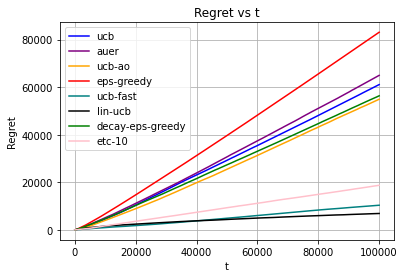

In [7]:
plt.plot(ucb_regret, 'b', label="ucb")
plt.plot(auer_regret, 'purple', label="auer")
plt.plot(ucbao_regret, 'orange', label="ucb-ao")
plt.plot(epsg_regret, 'r', label="eps-greedy")
plt.plot(ucbfast_regret, 'teal', label="ucb-fast")
plt.plot(linucb_regret, 'black', label="lin-ucb")
plt.plot(depsg_regret, 'g', label="decay-eps-greedy")
plt.plot(etc_regret, 'pink', label="etc-10")

plt.xlabel('t')
plt.ylabel('Regret')
plt.title('Regret vs t')
plt.legend()
plt.grid(True)
plt.show()